# Binary Classifier Using Convolutional Neural Network

**Convolution layer -** Converts images into an array.

**ReLu Layer -** Regularization used to convert negative numbers to zero.

**Pooling Layer -** Used for reduction of the input images size with filters.

**Fully Connected Layers -** Combines features and produces a model.

In [3]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-06-14 04:21:10--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-06-14 04:21:10--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20b8bfda00eb4bfb847034ea8d.dl.dropboxusercontent.com/cd/0/inline/CUza5L__41e_tAdb1_ORMBSF6ZBtf9yilmVaUxca1qVdu4FPbUOqemcJy0onlCrIioct-nEzfr-9Ydei6Kp5hTf724bM_fWB1DIC6Wyfc8jt88Q2jvvvdEJnlNcf0FZ50_eXe11DYSLxBt78Ik_pcjKs/file# [following]
--2024-06-14 04:21:11--  https://uc20b8bfda00eb4bfb847034ea8d.dl.dropboxusercontent.com/

In [4]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

**Importing Libraries**

In [35]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [36]:
print(tensorflow.__version__)

2.15.0


**Parameter Initialization**

In [37]:
img_width, img_height=150,150
train_data_dir =r"/content/training_set/training_set"
validation_data_dir = r"/content/training_set/training_set"
nb_train_sample =100
nb_validation_samples=100
epochs = 20
batch_size=20

**checking shape of images**

image data is 3d array --> [rows][cols][channels]

In [38]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channel_first':
  input_shape=(3, img_width, img_height)
else:
  input_shape=(img_width, img_height,3)

**image generator to train the model**

In [39]:
train_datagen= ImageDataGenerator(rescale=1. /255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1. /255)
train_generator= train_datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height,), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
validation_generator= test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height), batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


**Representation of imagedatagenerator**

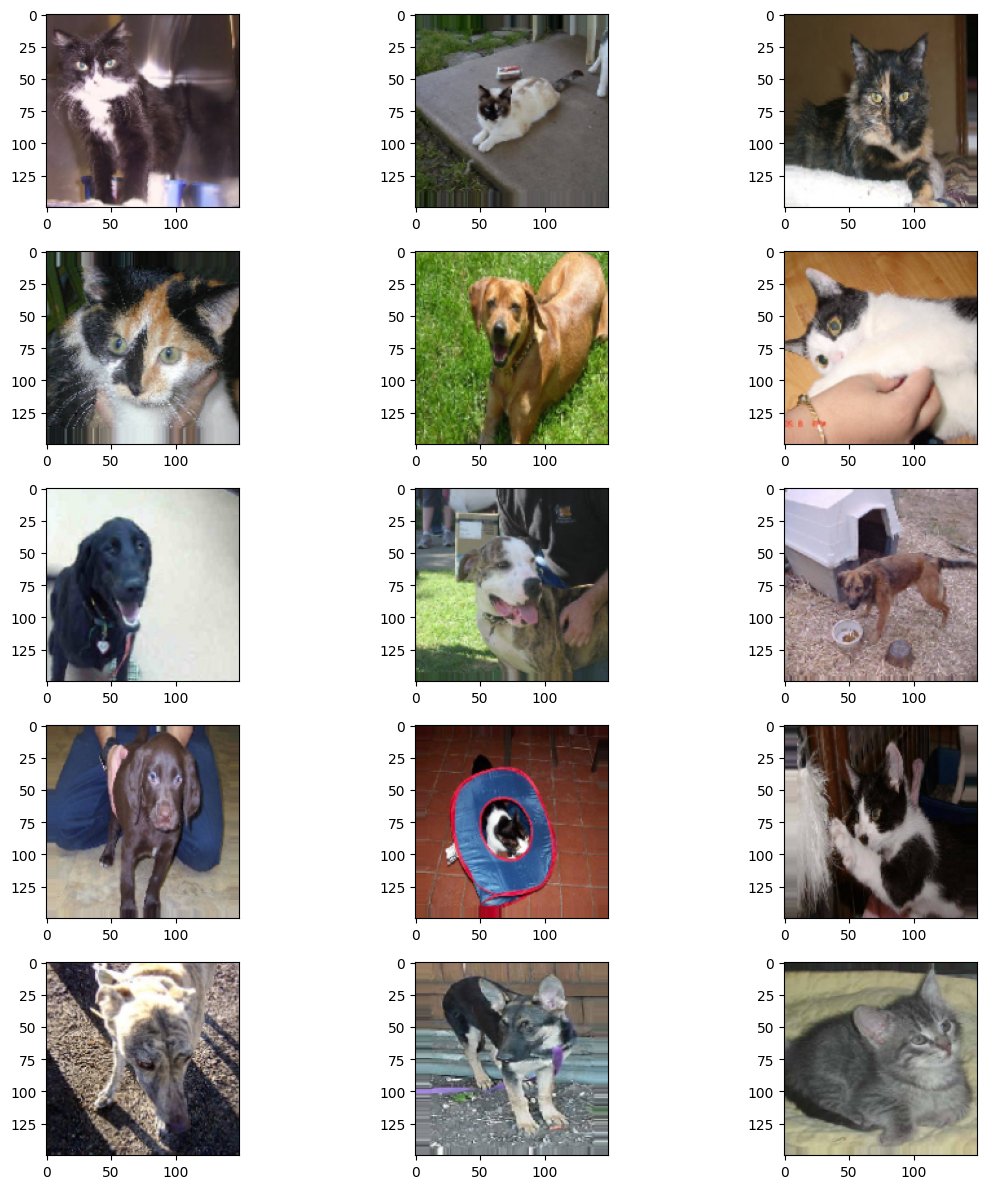

In [40]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch,Y_batch in train_generator:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

**Building CNN model**

1. Convolutional Layer
2. ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)

In [41]:
model = Sequential() #input layer
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons using 3 x 3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #pooling reduce the size of the data

model.add(Flatten()) #conversion of multidimensional array to 1D array
model.add(Dense(64))#hidden layer

model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

**Model Compilation**

In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

**Model Fitting**

In [43]:
training = model.fit(train_generator, steps_per_epoch= nb_train_sample, epochs= epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 19s 184ms/step - loss: 1.7633 - accuracy: 0.4885 - val_loss: 0.6930 - val_accuracy: 0.5010
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6996 - accuracy: 0.4815 - val_loss: 0.6932 - val_accuracy: 0.4880
Epoch 3/20
100/100 [==============================] - 17s 170ms/step - loss: 0.6938 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.4925
Epoch 4/20
100/100 [==============================] - 18s 182ms/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 5/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 6/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 7/20
100/100 [==============================] - 19s 186ms/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6931 - val_ac

**Finiding out model accuracy**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


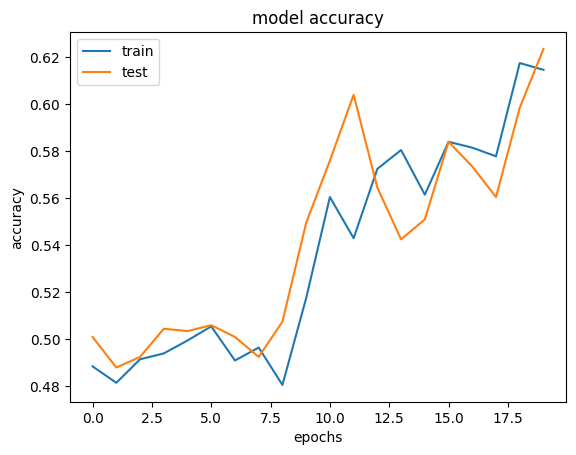

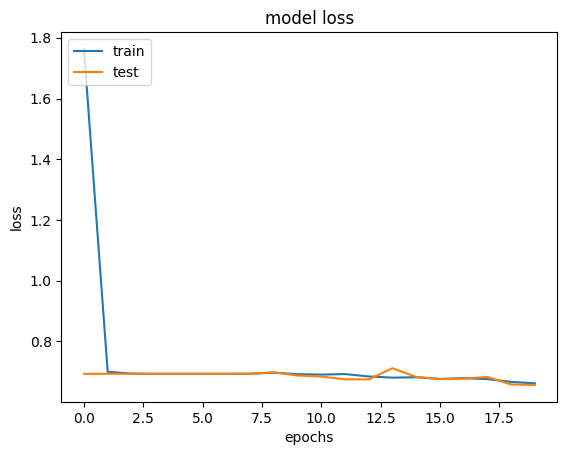

In [44]:

import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())  #listing all training data
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

**image prediction**

1/1 [==============================] - 0s 54ms/step
[[0.]]
prediction:  cat


<function matplotlib.pyplot.show(close=None, block=None)>

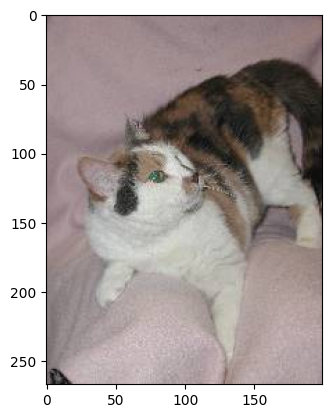

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4012.jpg", target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

result= model.predict(img_pred)
print(result)

if result[0][0]==1:
  prediction="Dog"
else:
  prediction="cat"
print('prediction: ',prediction)


img=plt.imread('/content/test_set/test_set/cats/cat.4012.jpg')
imgplot=plt.imshow(img)
plt.show